## Imports

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading Data

In [36]:
background = np.load("../background.npz")
background_wash = pd.DataFrame()
background_lou = pd.DataFrame()
for key in background:
    background_wash = pd.DataFrame(background[key][:, 0, :])
    background_lou = pd.DataFrame(background[key][:, 1, :])

bbh_for_challenge = np.load("../bbh_for_challenge.npy")
bbh_wash = pd.DataFrame(bbh_for_challenge[:, 0, :])
bbh_lou = pd.DataFrame(bbh_for_challenge[:, 1, :])

sglf_for_challenge = np.load("../sglf_for_challenge.npy")
sglf_wash = pd.DataFrame(sglf_for_challenge[:, 0, :])
sglf_lou = pd.DataFrame(sglf_for_challenge[:, 1, :])
background_wash

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.912700,0.824076,0.576957,0.093201,-0.727222,-1.361351,-0.951272,-1.013296,-1.862442,-1.049675,...,-0.162161,-0.999433,-1.205052,0.405147,0.201290,-0.429645,0.504653,0.206864,-0.277862,0.158232
1,0.427141,0.126220,-0.161994,0.403713,0.038805,-0.476123,0.154709,0.209876,-0.572138,-0.622040,...,-0.967748,0.707037,0.346977,-0.691613,0.393343,0.301089,-0.804138,-0.517599,0.025685,0.963850
2,-0.086852,-0.257643,0.286078,-0.410221,-0.248009,0.409330,-0.097382,-0.228333,-0.144682,0.281657,...,-0.522523,-1.104606,-0.994713,-0.423513,-0.390703,-0.225653,0.427141,0.126220,-0.161994,0.403713
3,-0.467690,-0.347351,1.450346,0.822984,-0.162333,0.438408,0.374263,-0.103600,-0.286963,-0.308334,...,0.326332,0.175887,-0.667282,0.125316,-0.197257,-0.598628,1.152626,0.333379,-1.004975,1.314771
4,-0.809874,0.640768,0.745038,0.452056,1.035492,0.674077,-0.106995,-0.014450,-0.588578,-1.377795,...,-1.651463,0.193009,0.712392,-0.583482,-0.226637,0.476310,0.113850,0.296872,0.463429,0.180622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.826049,0.440630,-1.069805,-1.526201,-0.805211,-0.476760,-0.057445,0.759658,0.582861,0.244476,...,-0.307721,0.032345,-0.572160,-0.456743,0.522552,0.801073,0.693412,0.674740,-0.539683,-1.468296
99996,0.062673,-0.256970,-0.700724,-0.101846,0.065833,-1.169791,-1.462546,-0.791182,-0.823350,-0.601440,...,-0.011915,-0.551839,-1.255722,-0.231084,1.447490,-0.252084,-1.418772,0.881975,0.575388,-0.809015
99997,0.710598,0.727790,-0.307129,-0.311979,-0.545969,-1.045502,-0.011805,0.020458,-0.890737,-0.203411,...,-0.093066,0.598196,0.382078,-0.003537,-0.655880,-1.195542,-0.902930,-0.639077,-0.211191,0.128643
99998,0.754398,-0.026008,-0.351263,0.004019,-0.012299,0.572878,0.174102,-0.269980,0.061830,-0.319454,...,-0.799699,0.854298,0.592271,-0.465235,0.359694,0.084467,-0.875319,-0.213518,-0.054979,-0.101118


https://arxiv.org/pdf/2106.02770 

For my current lab project i'm utilizing this neural process model used in spatiotemporal ML/climate visualizations, which also has a (latent) encoder and a decoder. 

## Background Data EDA

In [38]:
background_wash_samples = background_wash.mean(axis=0)
background_wash_samples

0     -0.001145
1      0.000479
2      0.002834
3      0.002366
4      0.001530
         ...   
195    0.005286
196    0.004215
197    0.001990
198    0.001122
199    0.000299
Length: 200, dtype: float64

(array([ 2., 12., 19., 34., 43., 36., 24., 16.,  8.,  6.]),
 array([-0.00508086, -0.0040407 , -0.00300055, -0.00196039, -0.00092024,
         0.00011992,  0.00116008,  0.00220023,  0.00324039,  0.00428054,
         0.0053207 ]),
 <BarContainer object of 10 artists>)

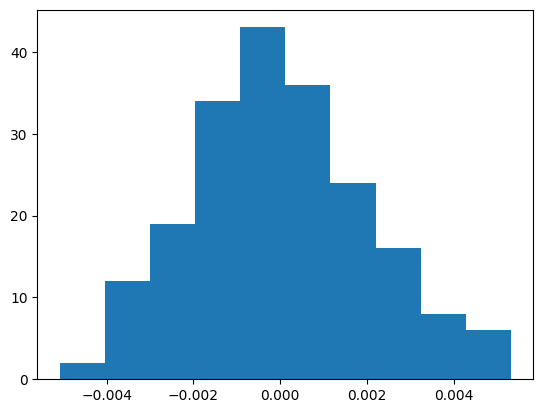

In [21]:
plt.hist(background_wash_samples)

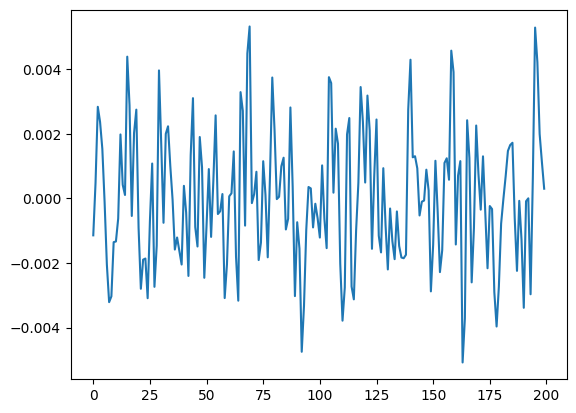

In [37]:
plt.plot(background_wash_samples)

In [39]:
background_lou_samples = background_lou.mean(axis=0)
background_lou_samples

0     -0.002030
1      0.002137
2      0.003740
3      0.000139
4     -0.001641
         ...   
195    0.004545
196   -0.003181
197   -0.003756
198   -0.000231
199   -0.001358
Length: 200, dtype: float64

(array([ 3.,  4., 21., 37., 38., 32., 36., 20.,  8.,  1.]),
 array([-5.67286691e-03, -4.53389131e-03, -3.39491571e-03, -2.25594011e-03,
        -1.11696451e-03,  2.20110844e-05,  1.16098668e-03,  2.29996228e-03,
         3.43893788e-03,  4.57791348e-03,  5.71688907e-03]),
 <BarContainer object of 10 artists>)

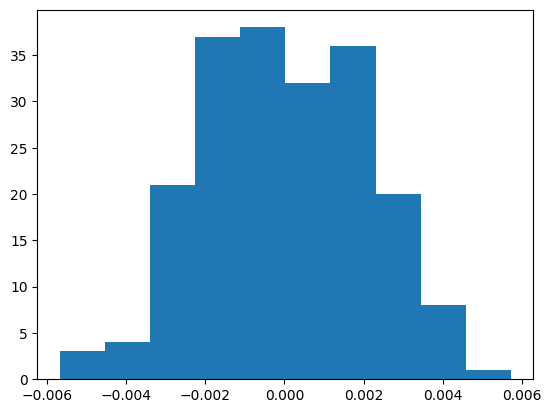

In [40]:
plt.hist(background_lou_samples)

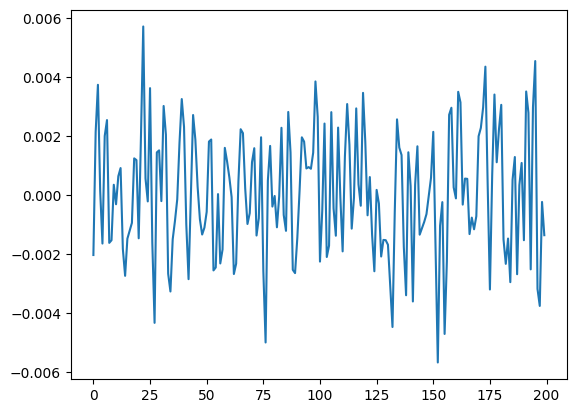

In [41]:
plt.plot(background_lou_samples)

## BBH EDA

(array([2.0000e+00, 4.5000e+01, 9.7200e+02, 7.7340e+03, 2.5512e+04,
        3.6556e+04, 2.2501e+04, 5.9290e+03, 7.0800e+02, 4.1000e+01]),
 array([-3.2516785 , -2.65170702, -2.05173555, -1.45176408, -0.8517926 ,
        -0.25182113,  0.34815034,  0.94812182,  1.54809329,  2.14806476,
         2.74803624]),
 <BarContainer object of 10 artists>)

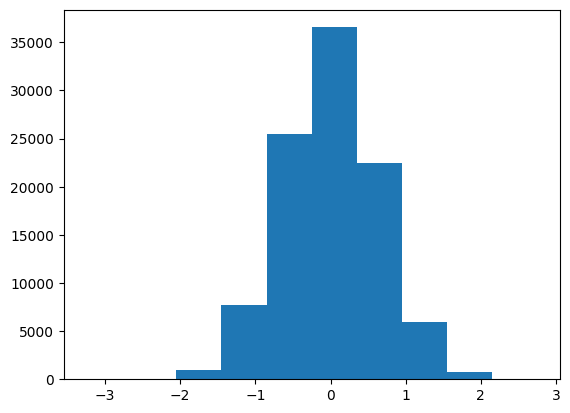

In [34]:
plt.hist(bbh_wash.iloc[:, 0])

(array([2.0000e+00, 8.6000e+01, 1.1830e+03, 7.8400e+03, 2.4365e+04,
        3.5310e+04, 2.3221e+04, 6.9760e+03, 9.5100e+02, 6.6000e+01]),
 array([-2.8113186 , -2.29663273, -1.78194686, -1.26726099, -0.75257512,
        -0.23788925,  0.27679662,  0.79148249,  1.30616836,  1.82085423,
         2.3355401 ]),
 <BarContainer object of 10 artists>)

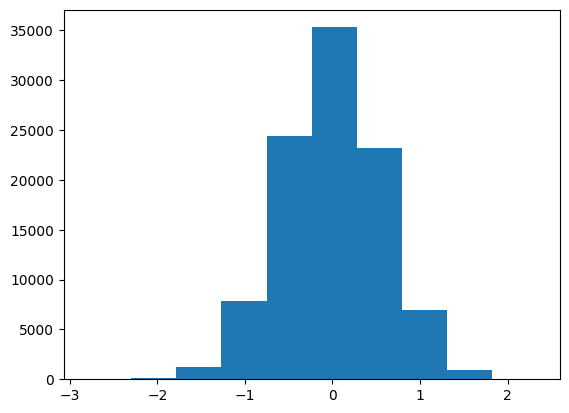

In [42]:
plt.hist(bbh_lou.iloc[:, 0])

In [43]:
bbh_wash_samples = bbh_wash.mean(axis=0)
bbh_wash_samples

0      0.002846
1      0.000617
2     -0.001740
3      0.000522
4      0.002744
         ...   
195    0.003222
196   -0.001746
197   -0.000227
198    0.003766
199    0.004572
Length: 200, dtype: float64

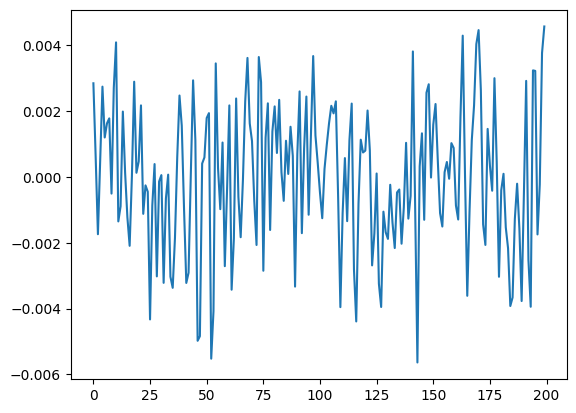

In [44]:
plt.plot(bbh_wash_samples)

In [45]:
bbh_lou_samples = bbh_lou.mean(axis=0)
bbh_lou_samples

0      0.001003
1      0.000165
2     -0.001445
3     -0.001471
4      0.000749
         ...   
195   -0.001370
196    0.001704
197   -0.002957
198   -0.002117
199    0.001655
Length: 200, dtype: float64

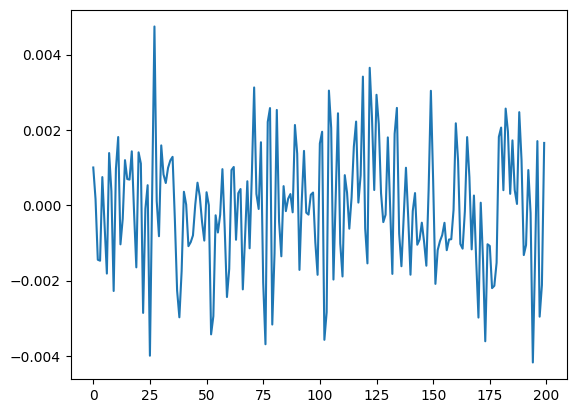

In [46]:
plt.plot(bbh_lou_samples)

## SGLF EDA

In [47]:
sglf_wash_samples = sglf_wash.mean(axis=0)
sglf_wash_samples

0      0.000407
1     -0.001126
2     -0.001890
3     -0.005399
4     -0.005042
         ...   
195    0.001915
196   -0.001825
197   -0.002582
198    0.000070
199   -0.001505
Length: 200, dtype: float64

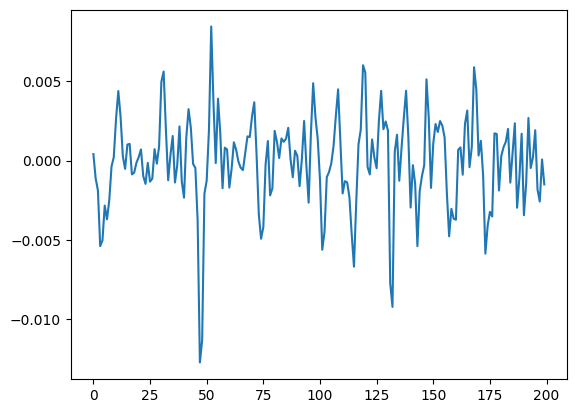

In [48]:
plt.plot(sglf_wash_samples)

In [49]:
sglf_lou_samples = sglf_lou.mean(axis=0)
sglf_lou_samples

0      0.002217
1      0.001129
2     -0.002127
3     -0.000318
4      0.000408
         ...   
195   -0.001158
196    0.000107
197    0.001032
198    0.001467
199   -0.001046
Length: 200, dtype: float64

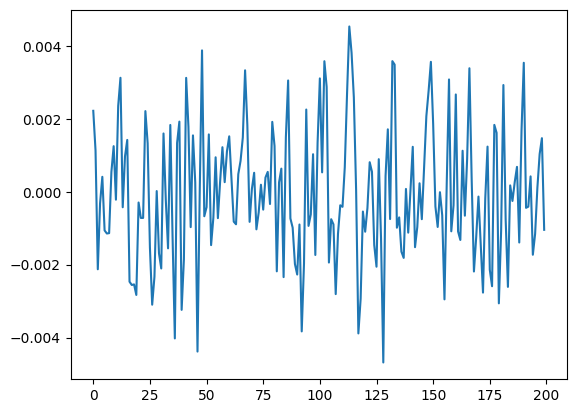

In [50]:
plt.plot(sglf_lou_samples)